In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import json
import numpy as np

In [4]:
EXPERIMENT_BASE_DIR = '/media/big-ssd/experiments'
EXPERIMENT_NAME = 'P3856'
EXPERIMENT_DIR = '{}/{}'.format(EXPERIMENT_BASE_DIR, EXPERIMENT_NAME)
RUN_NAME = 'P3856_YHE211_1_Slot1-1_1_5104'

In [5]:
d = pd.read_pickle('{}/identifications-pasef/exp-{}-identifications-pasef-recalibrated.pkl'.format(EXPERIMENT_DIR, EXPERIMENT_NAME))
idents_df = d['identifications_df']

In [6]:
idents_df = idents_df[idents_df['percolator q-value'] < 0.01]

In [7]:
idents_df.mono_intensity_adjustment_outcome.value_counts(normalize=True) * 100

monoisotopic_not_saturated         94.637600
monoisotopic_saturated_adjusted     5.278284
no_nonsaturated_isotopes            0.084116
Name: mono_intensity_adjustment_outcome, dtype: float64

In [16]:
# find the precursor id of an ident that has high intensity but was not in saturation
idents_df = idents_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
idents_df[(idents_df.mono_intensity_adjustment_outcome == 'monoisotopic_not_saturated')].head(5).precursor_cuboid_id

51271    39942
34762    28174
42650    33777
34889    28273
27327    23018
Name: precursor_cuboid_id, dtype: int64

In [18]:
idents_df[(idents_df.mono_intensity_adjustment_outcome == 'monoisotopic_not_saturated')].tail(5).precursor_cuboid_id

59096    46006
62753    49214
4087      5853
28378    23735
64809    51742
Name: precursor_cuboid_id, dtype: int64

In [17]:
idents_df[(idents_df.mono_intensity_adjustment_outcome == 'monoisotopic_saturated_adjusted') & (idents_df.isotope_count > 4)].head(5).precursor_cuboid_id

51369    40036
39815    31702
57410    44699
51330    40004
23554    20276
Name: precursor_cuboid_id, dtype: int64

In [8]:
selected_sequence = idents_df.loc[55760]

In [9]:
isotope_intensities_df = pd.DataFrame(selected_sequence.isotopic_peak_intensities_from_raw_points)

In [10]:
isotope_intensities_df

,mz,intensity,saturated,inferred_intensity,inferred
0,998.991330,670185,True,711505,True
1,999.492707,728140,True,766970,True
2,999.992623,457776,True,450673,True
3,1000.493231,188651,False,188651,False
4,1000.992464,64914,False,64914,False


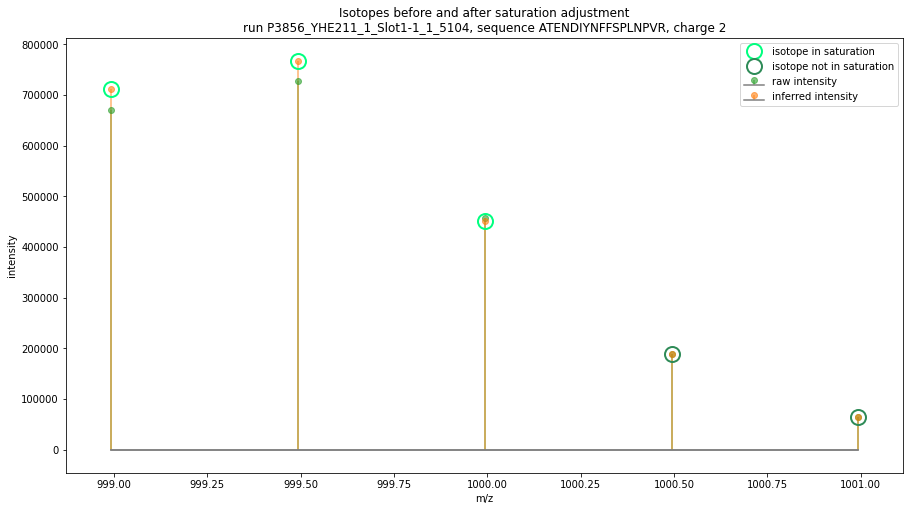

In [11]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(isotope_intensities_df.mz, isotope_intensities_df.intensity, use_line_collection=True, label='raw intensity')
plt.setp(markerline, 'color', 'tab:green')
plt.setp(stemlines, 'color', 'tab:green')
plt.setp(baseline, 'color', colors[7])
plt.setp(markerline, 'alpha', 0.6)
plt.setp(stemlines, 'alpha', 0.6)

markerline, stemlines, baseline = ax.stem(isotope_intensities_df.mz, isotope_intensities_df.inferred_intensity, use_line_collection=True, label='inferred intensity')
plt.setp(markerline, 'color', 'tab:orange')
plt.setp(stemlines, 'color', 'tab:orange')
plt.setp(baseline, 'color', colors[7])
plt.setp(markerline, 'alpha', 0.6)
plt.setp(stemlines, 'alpha', 0.6)

# highlight the isotopes with inferred intensity
adjusted_intensity_df = isotope_intensities_df[(isotope_intensities_df.inferred == True)]
ax.plot(adjusted_intensity_df.mz, adjusted_intensity_df.inferred_intensity, marker='o', markerfacecolor='none', markeredgecolor='springgreen', linestyle='', markeredgewidth=2, ms=15, label='isotope in saturation')

# highlight the isotopes without inferred intensity
not_adjusted_intensity_df = isotope_intensities_df[(isotope_intensities_df.inferred == False)]
ax.plot(not_adjusted_intensity_df.mz, not_adjusted_intensity_df.inferred_intensity, marker='o', markerfacecolor='none', markeredgecolor='seagreen', linestyle='', markeredgewidth=2, ms=15, label='isotope not in saturation')

plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(8)
f.set_figwidth(15)
plt.margins(0.06)
plt.legend(loc='best')
plt.title('Isotopes before and after saturation adjustment\nrun {}, sequence {}, charge {}'.format(RUN_NAME, selected_sequence.sequence, selected_sequence.charge))
plt.show()

#### distribution of identifications and their monoisotopes in saturation

No handles with labels found to put in legend.


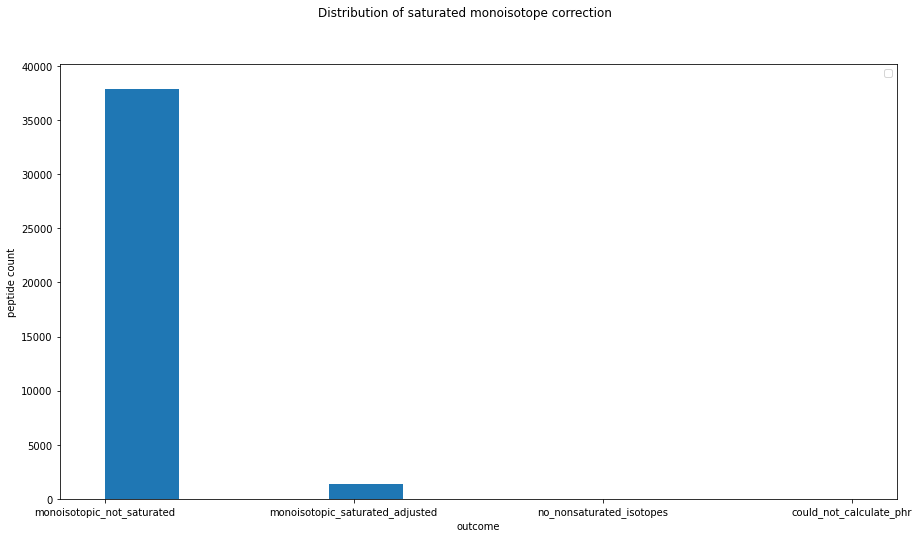

In [12]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

plt.hist(idents_df.mono_intensity_adjustment_outcome)

plt.legend(loc='best')
plt.xlabel('outcome')
plt.ylabel('peptide count')
plt.margins(0.06)
plt.suptitle('Distribution of saturated monoisotope correction')
# plt.title('{}'.format(feature_list_filename))
plt.show()


#### distribution of isotopes in saturation

In [12]:
df = extracted_features_df[(extracted_features_df.isotope_idx_not_in_saturation > 0)]

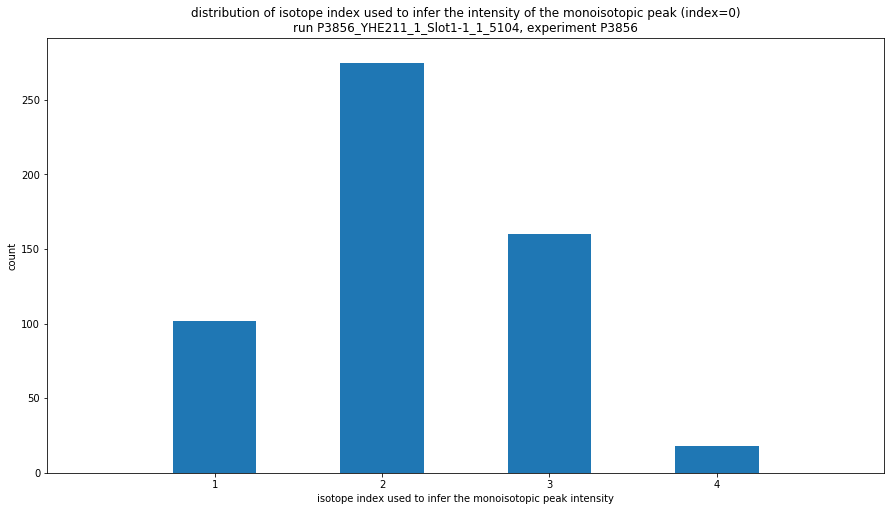

In [23]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

counts = np.bincount(df.isotope_idx_not_in_saturation)
ax1.bar(range(df.isotope_idx_not_in_saturation.max()+1), counts, width=0.5, align='center')
ax1.set(xticks=range(1,df.isotope_idx_not_in_saturation.max()+1), xlim=[0, df.isotope_idx_not_in_saturation.max()+1])

plt.xlabel('isotope index used to infer the monoisotopic peak intensity')
plt.ylabel('count')
plt.title('distribution of isotope index used to infer the intensity of the monoisotopic peak (index=0)\nrun {}, experiment {}'.format(RUN_NAME, EXPERIMENT_NAME))

plt.show()